In [ ]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  
  return results

In [ ]:
# 훈련데이터와 테스트 데이터의 벡터 변환 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# 라벨 데이터를 카테고리 데이터로 전환 
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
# 모델 구성
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [ ]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 84ms/step - loss: 2.6971 - accuracy: 0.5134 - val_loss: 1.7712 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 1s 78ms/step - loss: 1.4882 - accuracy: 0.6956 - val_loss: 1.3264 - val_accuracy: 0.7020
Epoch 3/20
16/16 [==============================] - 1s 90ms/step - loss: 1.1416 - accuracy: 0.7587 - val_loss: 1.1591 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 1s 61ms/step - loss: 0.9394 - accuracy: 0.7968 - val_loss: 1.0644 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 1s 54ms/step - loss: 0.7851 - accuracy: 0.8335 - val_loss: 1.0083 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6544 - accuracy: 0.8591 - val_loss: 0.9705 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5504 - accuracy: 0.8830 - val_loss: 0.9344 - val_accuracy: 0.8030
Epoch 8/20
16

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_accuracy']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

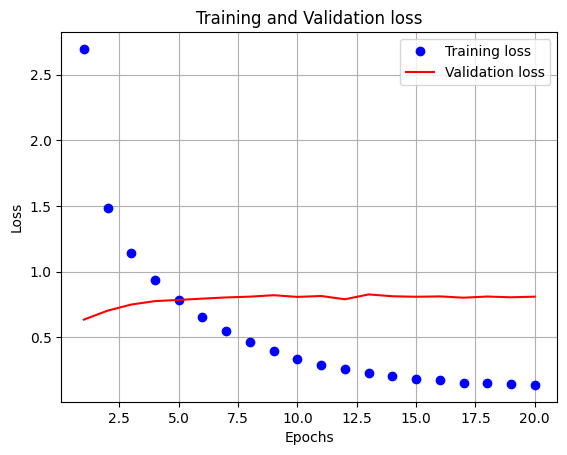

In [ ]:
epochs= range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'r-',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

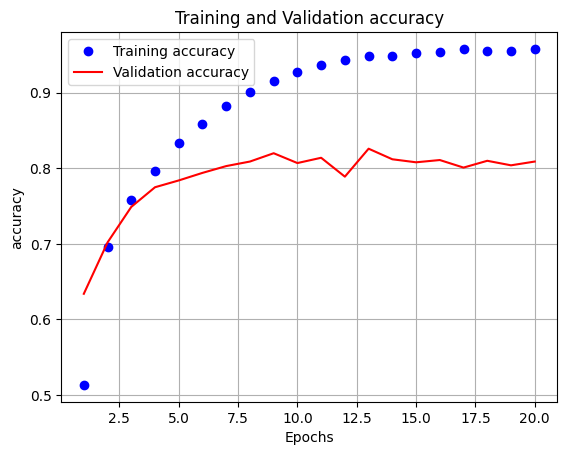

In [ ]:
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'r-',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

In [ ]:
# 검증 된 결과로 다시 학습 

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(partial_x_train, # 학습용 데이터
                  partial_y_train, 
                  epochs=12,
                  batch_size=512,
                  validation_data=(x_val,y_val))

eval_result=model.evaluate(x_test,one_hot_test_labels)
print(eval_result)

Epoch 1/12
16/16 [==============================] - 2s 64ms/step - loss: 2.7125 - accuracy: 0.5065 - val_loss: 1.8456 - val_accuracy: 0.5910
Epoch 2/12
16/16 [==============================] - 1s 55ms/step - loss: 1.5362 - accuracy: 0.6771 - val_loss: 1.3765 - val_accuracy: 0.7000
Epoch 3/12
16/16 [==============================] - 1s 51ms/step - loss: 1.1659 - accuracy: 0.7494 - val_loss: 1.1835 - val_accuracy: 0.7510
Epoch 4/12
16/16 [==============================] - 1s 48ms/step - loss: 0.9421 - accuracy: 0.8004 - val_loss: 1.0816 - val_accuracy: 0.7830
Epoch 5/12
16/16 [==============================] - 1s 49ms/step - loss: 0.7705 - accuracy: 0.8379 - val_loss: 1.0158 - val_accuracy: 0.7950
Epoch 6/12
16/16 [==============================] - 1s 55ms/step - loss: 0.6356 - accuracy: 0.8672 - val_loss: 0.9496 - val_accuracy: 0.8020
Epoch 7/12
16/16 [==============================] - 1s 50ms/step - loss: 0.5207 - accuracy: 0.8909 - val_loss: 0.9089 - val_accuracy: 0.8190
Epoch 8/12
16